In [1]:
import pandas as pd
import requests
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid',palette='husl')
matplotlib.rcParams['pdf.fonttype'] = 42

#wordcloud imports
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

% matplotlib inline

#warnings
c:\intelpython3\lib\site-packages\matplotlib\__init__.py:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# !pip install pillow

     |████████████████████████████████| 3.9MB 23kB/s eta 0:00:01357     |██████████████████▋             | 2.2MB 19kB/s eta 0:01:24


In [3]:
#load in the dataframe
df=pd.read_csv('datingappbehavior.csv')

# Look at the Dataframe

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 25 columns):
Timestamp                                                                                                                                                      476 non-null object
Have you used a dating app or online dating site before?                                                                                                       476 non-null object
How many of your friends use or have used dating apps or online dating?                                                                                        476 non-null object
Have you been on a date with someone you are not in a committed relationship with in the last month ?                                                          476 non-null object
If yes, how did you meet this person? (check all that apply)                                                                                                   182 non-null object


In [8]:
#rename columns
df=df.rename(columns={'Race (taken from census)':'race_census','Race (how you identify, feel free to elaborate on the above categories or make your own)':'race_identity'})

In [9]:
df[['race_census','race_identity']]

,race_census,race_identity
0,White,NaN
1,Asian,NaN
2,Asian,NaN
3,White,NaN
4,White,NaN
5,Asian,NaN
6,NaN,NaN
7,Black or African American,NaN
8,White,NaN
9,White,NaN


In [13]:
df['race_census'].value_counts()

White                                         314
Asian                                          94
Two or more races                              38
Black or African American                      14
Native Hawaiian and Other Pacific Islander      2
American Indian and Alaska Native               2
Name: race_census, dtype: int64

In [24]:
race=df.groupby('race_census')

NameError: name 'sizes' is not defined

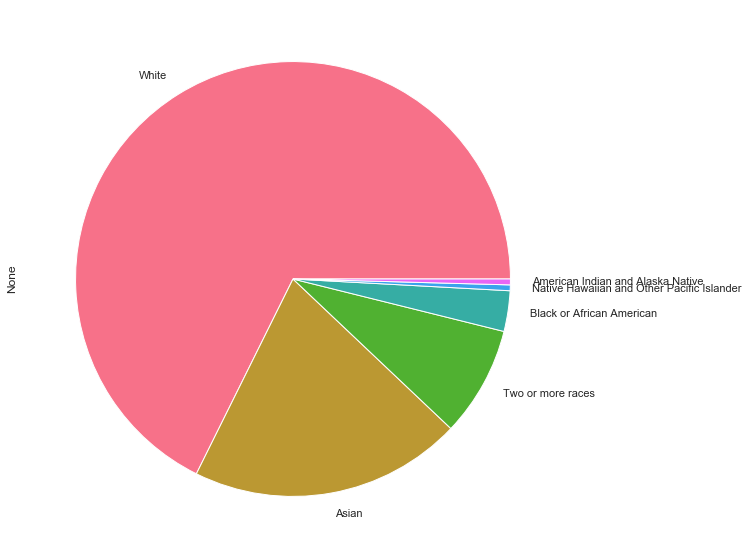

In [30]:
plt.figure(figsize=(15,10))
race.size().sort_values(ascending=False).plot.pie()
plt.show()

# Clean Data

In [15]:
#we need to make dataframes based on race
white=df[df['race_census']=='White']
asian=df[df['race_census']=='Asian']
more =df[df['race_census']=='Two or more races']
black=df[df['race_census']=='Black or African American']

In [16]:
#filter to columns I want
white=white[['race_census','race_identity']]
asian=asian[['race_census','race_identity']]
more=more[['race_census','race_identity']]
black=black[['race_census','race_identity']]

In [17]:
#fill nas
white=white.fillna('White')
asian=asian.fillna('Asian')
more=more.fillna('Two or more races')
black=black.fillna('Black or African American')

In [22]:
more['race_identity'].value_counts()

Two or more races                                                                                                                                                              22
https://m.youtube.com/watch?v=1TXNU1nh4E4                                                                                                                                       1
White and Hispanic.                                                                                                                                                             1
Asian American but white because I look Caucasian                                                                                                                               1
Middle Eastern American                                                                                                                                                         1
Mixed Race                                                                                                    